Python Assignment Applied Economic Analysis 1

**Joost Flint u1244699 (732773)**


# Research question

Is there correlation between the Corruption perception Index and the Bigmac dollar price?

# Motivation

Corruption is a big problem world wide, Kaufmann and Gray(1998) concluded that bribery is widespread and most common in developing and transition countries. Bribery increases transaction costs and creates insecurity in the economy. Bribery is unfair, as it imposes a regressive tax, which heavily burdens in particular commercial and service activities performed by small businesses. 
The Big Mac Index is used to compare purchacing power of countries. If a Big Mac is more expensive in another currency it this currency is overvalued. As corruption leads to more costs so I think it is interesting to visualize if there is correlation between the Corruption perception Index and the Big Mac Index. Moreover, i expect that with a higher Corruption perception Index(which means less corrupt) the dollar price of a Big Mac to be lower. 


# Method

To answer my Research question:Is there correlation between the Corruption perception Index and the Bigmac dollar price? I combine two datasets, one dataset with information about the Big Mac Index from The Economist and a second dataset obtained from Transparency International about the Corruption Perception Index. I merge them with 'inner' which means only countries with information in both dataset are in the new dataset. With this dataset i provide different graphs, first I try to answer the question by comparing both indexes per country. If this does not lead to a conclusive answer I will look at all countries at once and look if there is a trend and answer the Research Question. 

# Preview of the answers

I do find correlation between the Corruption perception Index and the Big Mac dollar price. The effect is different than expected, countries with on average a higher Corruption percetion Index have an on average higher Big Mac price, this is unexpected because corruption is something that leads to more costs.

# Main assumptions

I assume that everything else stays equal. This is a big assumption, other variables might and probally do influence outcomes. I will talk more about this in the Discussion.


# Python code

To answer the Research Question I need to combine both datasets. The first dataset is the Corruption perception index. Shown are the first 8 observations. Because the dataset contains data from 7 years the first 7 observations are all for Afghanistan. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

col_names= ['Country','Code','Year','Corruption perception Index']
corruption = pd.read_excel(r'corruption1.xls',names=col_names)
corruption.iloc[0:8,:]

,Country,Code,Year,Corruption perception Index
0,Afghanistan,AFG,2012,8
1,Afghanistan,AFG,2013,8
2,Afghanistan,AFG,2014,12
3,Afghanistan,AFG,2015,11
4,Afghanistan,AFG,2016,15
5,Afghanistan,AFG,2017,15
6,Afghanistan,AFG,2018,16
7,Albania,ALB,2012,33


In [2]:
corruption.dtypes

Country                        object
Code                           object
Year                            int64
Corruption perception Index     int64
dtype: object

Secondly, the Bigmac dataset is opened. Again, the first 8 observations are shown. This excel file uses multiple sheets. Only the first sheet is opened with the code below. Lateron, data from all sheets are appended with a newly added variable 'Year'.

In [3]:

filepath = 'big-mac-2019-2012.xls'
col_names= ['Country','Code','Currencycode','local price','dollar ex','dollar price','dollar ppp','GDP dollar','dollar valuation','euro valuation','sterling valuation','yen valuation','yuan valuation','dollar adj valuation','euro adj valuation','sterling adj valuation','yen adj valuation','yuan adj valuation']
BigMac = pd.read_excel(filepath,names=col_names)
BigMac.iloc[1:9,:]


,Country,Code,Currencycode,local price,dollar ex,dollar price,dollar ppp,GDP dollar,dollar valuation,euro valuation,sterling valuation,yen valuation,yuan valuation,dollar adj valuation,euro adj valuation,sterling adj valuation,yen adj valuation,yuan adj valuation
1,Argentina,ARG,ARS,75.00,18.937500,3.960396,14.204545,12493.909,-25.0,-18.1,-10.3,15.4,24.9,18.7,5.9,21.6,54.7,17.8
2,Australia,AUS,AUD,5.90,1.253683,4.706135,1.117424,51737.228,-10.9,-2.7,6.6,37.1,48.4,-6.4,-16.5,-4.0,22.0,-7.0
3,Brazil,BRA,BRL,16.50,3.227900,5.111683,3.125000,8726.901,-3.2,5.7,15.8,48.9,61.2,61.0,43.6,65.0,109.8,59.8
4,Canada,CAN,CAD,6.55,1.245900,5.257244,1.240530,42224.939,-0.4,8.7,19.1,53.2,65.8,13.8,1.6,16.7,48.4,13.1
5,Switzerland,CHE,CHF,6.50,0.960850,6.764844,1.231061,80345.623,28.1,39.9,53.3,97.1,113.3,8.1,-3.6,10.8,40.9,7.3
6,Chile,CHL,CLP,2600.00,605.935000,4.290889,492.424242,13575.996,-18.7,-11.3,-2.8,25.0,35.3,26.8,13.1,30.0,65.3,25.9
7,China,CHN,CNY,20.40,6.432000,3.171642,3.863636,8123.256,-39.9,-34.4,-28.1,-7.6,0.0,0.7,-10.1,3.2,31.3,0.0
8,Colombia,COL,COP,10900.00,2844.120000,3.832468,2064.393939,5792.182,-27.4,-20.7,-13.2,11.7,20.8,25.7,12.1,28.8,63.8,24.8


Below we open all Bigmac sheets.

In [4]:
xls = pd.ExcelFile('big-mac-2019-2012.xls')
sheet_to_df_map = pd.read_excel('big-mac-2019-2012.xls',sheet_name=None,names=col_names)

First I need to add the variable 'Year' to all sheets. Afterwards I can append the sheets. The print shows the dataset after the appending the sheet togheter.

In [5]:
year2012=sheet_to_df_map['Jan2012']
year2012.loc[:,'Year'] = 2012

year2013=sheet_to_df_map['Jan2013']
year2013.loc[:,'Year'] = 2013

year2014=sheet_to_df_map['Jan2014']
year2014.loc[:,'Year'] = 2014

year2015=sheet_to_df_map['Jan2015']
year2015.loc[:,'Year'] = 2015

year2016=sheet_to_df_map['Jan2016']
year2016.loc[:,'Year'] = 2016

year2017=sheet_to_df_map['Jan2017']
year2017.loc[:,'Year'] = 2017

year2018=sheet_to_df_map['Jan2018']
year2018.loc[:,'Year'] = 2018

In [6]:
a =year2012.append(year2013, ignore_index = True)
b = a.append(year2014, ignore_index = True)
c = b.append(year2015, ignore_index = True)
d = c.append(year2016, ignore_index = True)
e = d.append(year2017, ignore_index = True)
f= e.append(year2018, ignore_index = True)
print(f)

            Country Code Currencycode   local price     dollar ex  \
0               UAE  ARE          AED     12.000000      3.673000   
1         Argentina  ARG          ARS     20.000000      4.313500   
2         Australia  AUS          AUD      4.800000      0.972337   
3            Brazil  BRA          BRL     10.250000      1.805000   
4            Canada  CAN          CAD      4.730000      1.020950   
5       Switzerland  CHE          CHF      6.500000      0.955100   
6             Chile  CHL          CLP   2050.000000    506.050000   
7             China  CHN          CNY     15.400000      6.315500   
8          Colombia  COL          COP   8400.000000   1852.150000   
9        Costa Rica  CRI          CRC   2050.000000    509.540000   
10   Czech Republic  CZE          CZK     70.220000     20.365350   
11          Denmark  DNK          DKK     31.500000      5.861350   
12            Egypt  EGY          EGP     15.500000      6.037000   
13        Euro area  EUZ          

Before the merge the variables Country and Year are combined to create a unique variable. I merge the datasets based on 'inner'. This means that only countries present in both datasets are included in the new, merged dataset. Below the Bigmac and the Corruption perception Index are merged, after the merge I sort the data on the variable 'CY'. The reason for this is that now the data is sorted by country and year. As can be seen in the first column, data from for example Argentina is numbered 0,39,78,117,157,197 and 237. Without sorting the data on'CY' the data was not easily red per Country. The merged dataset contains 277 observations and 40 unique countries. The only country with less that 7 observations is Vietnam, only data from 2015-2018 is available. 

In [7]:
corruption["CY"] =corruption["Country"].map(str) + corruption["Year"].map(str)
f["CY"] = f["Country"].map(str) + f["Year"].map(str)

In [8]:
df_merged = pd.merge(f,corruption, how='inner', on=['CY'])

In [9]:
df=df_merged.rename(columns = {'Country_x': 'Country','Year_x':'Year'})

In [10]:
df.drop(['Code_x', 'Currencycode','local price','dollar ex','dollar ppp','GDP dollar','dollar valuation','euro valuation','sterling valuation','yen valuation','yuan valuation','dollar adj valuation','euro adj valuation','sterling adj valuation','yen adj valuation','yuan adj valuation','Country_y','Code_y','Year_y'],inplace=True,axis=1)
df.sort_values(by=['CY'])

,Country,dollar price,Year,CY,Corruption perception Index
0,Argentina,4.636606,2012,Argentina2012,35
39,Argentina,3.817944,2013,Argentina2013,34
78,Argentina,3.034134,2014,Argentina2014,34
117,Argentina,3.252033,2015,Argentina2015,32
157,Argentina,2.389703,2016,Argentina2016,36
197,Argentina,3.468390,2017,Argentina2017,39
237,Argentina,3.960396,2018,Argentina2018,40
1,Australia,4.936560,2012,Australia2012,85
40,Australia,4.900455,2013,Australia2013,81
79,Australia,4.473542,2014,Australia2014,80


Some descriptive statistics are shown below. First of all, the averages for all countries togheter. This shows us that the dollar price varies between 1.20 and 7.84. The Corruption perception Index has a minimum value of 25 while the highest score is 92. In this table it is not possible to see which countries had the lowest or highest values. This is possible but I need to use groupby. This leads to results per country and is shown aswell. 

In [11]:
dff = df.sort_values(by=['CY'])
dff.describe()

,dollar price,Year,Corruption perception Index
count,277.000000,277.000000,277.000000
mean,3.550162,2015.021661,54.927798
std,1.276702,2.001693,20.400923
min,1.200860,2012.000000,25.000000
25%,2.584897,2013.000000,37.000000
50%,3.305923,2015.000000,50.000000
75%,4.324580,2017.000000,74.000000
max,7.842279,2018.000000,92.000000


As mentioned before, with use of groupby it is possible to look at the descriptive statistics per country. Below it can be seen that the lowest Corruption perception index is 25 for Ukraine While Denmark had the highest score of 92. 

In [12]:
dff.groupby("Country").describe()

Corruption perception Index                                   \
                                     count       mean       std   min   25%   
Country                                                                       
Argentina                              7.0  35.714286  2.870208  32.0  34.0   
Australia                              7.0  79.714286  2.751623  77.0  78.0   
Brazil                                 7.0  39.714286  3.147183  35.0  37.5   
Canada                                 7.0  82.000000  1.154701  81.0  81.0   
Chile                                  7.0  69.428571  2.760262  66.0  67.0   
China                                  7.0  38.857143  1.772811  36.0  38.0   
Colombia                               7.0  36.571429  0.534522  36.0  36.0   
Costa Rica                             7.0  55.571429  2.225395  53.0  54.0   
Czech Republic                         7.0  53.571429  4.237025  48.0  50.0   
Denmark                                7.0  90.000000  1.527525  88.0  89.0   
Egypt                                  7.0  34.000000  2.081666  32.0  32.0   
Hong Kong                              7.0  75.857143  1.214986  74.0  75.0   
Hungary                                7.0  50.428571  4.117327  45.0  47.0   
India                                  7.0  38.428571  1.988060  36.0  37.0   
Indonesia                              7.0  35.142857  2.478479  32.0  33.0   
Israel                                 7.0  61.285714  1.380131  60.0  60.5   
Japan                                  7.0  73.857143  1.345185  72.0  73.0   
Malaysia                               7.0  49.142857  1.772811  47.0  48.0   
Mexico                                 7.0  31.571429  2.760262  28.0  29.5   
New Zealand                            7.0  89.857143  1.463850  87.0  89.5   
Norway                                 7.0  85.571429  1.272418  84.0  85.0   
Pakistan                               7.0  30.142857  2.267787  27.0  28.5   
Peru                                   7.0  36.714286  1.380131  35.0  35.5   
Philippines                            7.0  35.428571  1.397276  34.0  34.5   
Poland                                 7.0  60.571429  1.618347  58.0  60.0   
Russia                                 7.0  28.285714  0.755929  27.0  28.0   
Saudi Arabia                           7.0  47.857143  2.672612  44.0  46.0   
Singapore                              7.0  85.000000  1.154701  84.0  84.0   
South Africa                           7.0  43.428571  0.975900  42.0  43.0   
South Korea                            7.0  54.857143  1.345185  53.0  54.0   
Sri Lanka                              7.0  37.714286  1.253566  36.0  37.0   
Sweden                                 7.0  87.142857  1.951800  84.0  86.0   
Switzerland                            7.0  85.571429  0.534522  85.0  85.0   
Taiwan                                 7.0  61.714286  0.951190  61.0  61.0   
Thailand                               7.0  36.571429  1.272418  35.0  35.5   
Turkey                                 7.0  44.000000  4.082483  40.0  41.0   
Ukraine                                7.0  27.857143  2.544836  25.0  26.0   
United States                          7.0  73.714286  1.603567  71.0  73.0   
Uruguay                                7.0  71.857143  1.573592  70.0  70.5   
Vietnam                                4.0  33.000000  1.632993  31.0  32.5   

                                  Year            ...                      \
                 50%   75%   max count    mean    ...         75%     max   
Country                                           ...                       
Argentina       35.0  37.5  40.0   7.0  2015.0    ...     2016.50  2018.0   
Australia       79.0  80.5  85.0   7.0  2015.0    ...     2016.50  2018.0   
Brazil          40.0  42.5  43.0   7.0  2015.0    ...     2016.50  2018.0   
Canada          82.0  82.5  84.0   7.0  2015.0    ...     2016.50  2018.0   
Chile           70.0  71.5  73.0   7.0  2015.0    ...     2016.50  2018.0   
C

With use of groupby it is also possible to make a bar chart for both the average dollar price and the average Corruption perception Index per country.

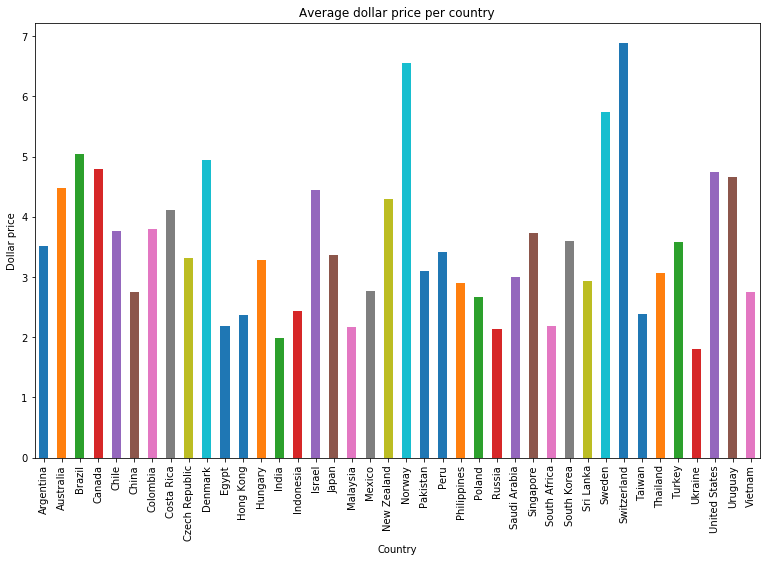

In [13]:
df.groupby("Country")['dollar price'].mean()
df.groupby("Country")['dollar price'].mean().plot(kind='bar',figsize=(13,8))
plt.title('Average dollar price per country')
plt.xlabel('Country')
plt.ylabel('Dollar price')
plt.show()

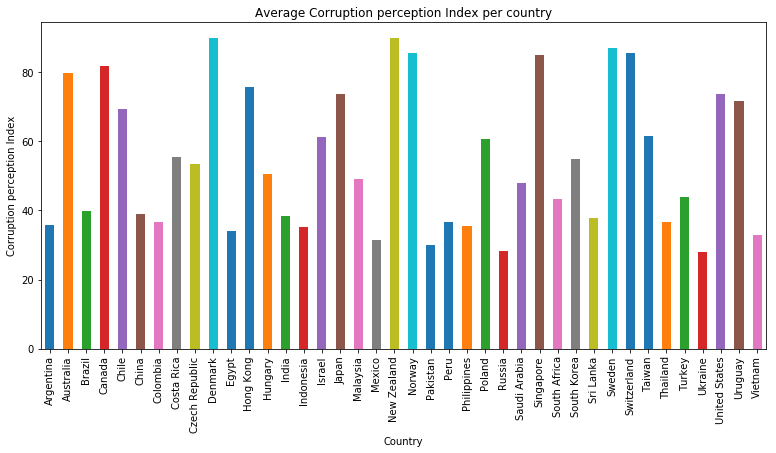

In [14]:
df.groupby("Country")['Corruption perception Index'].mean()
df.groupby("Country")['Corruption perception Index'].mean().plot(kind='bar',figsize=(13,6))
plt.title('Average Corruption perception Index per country')
plt.xlabel('Country')
plt.ylabel('Corruption perception Index')
plt.show()


In a optimal case everything else than the bigmac index and the corruption perception index stay constant. This is not possible in real life. I like to visualize the changes in both indexes per country over time. First of all, I make two graphs, one for the Big mac index and one for the Corruption perception Index. In these graphs all countries are shown at once, these graphs are not very clear because there are 40 countries in the dataset. Afterwards I show the changes in indexes over time per country. This means 2 graphs for 40 countries. These graphs can be made with use of the groupby and produce 40 graphs at once. I also made them 'by hand'. The reason i do this is because it is easier to compare the indexes per country, in this case there are two graphs per country below each other instead of 40 graphs for each index.

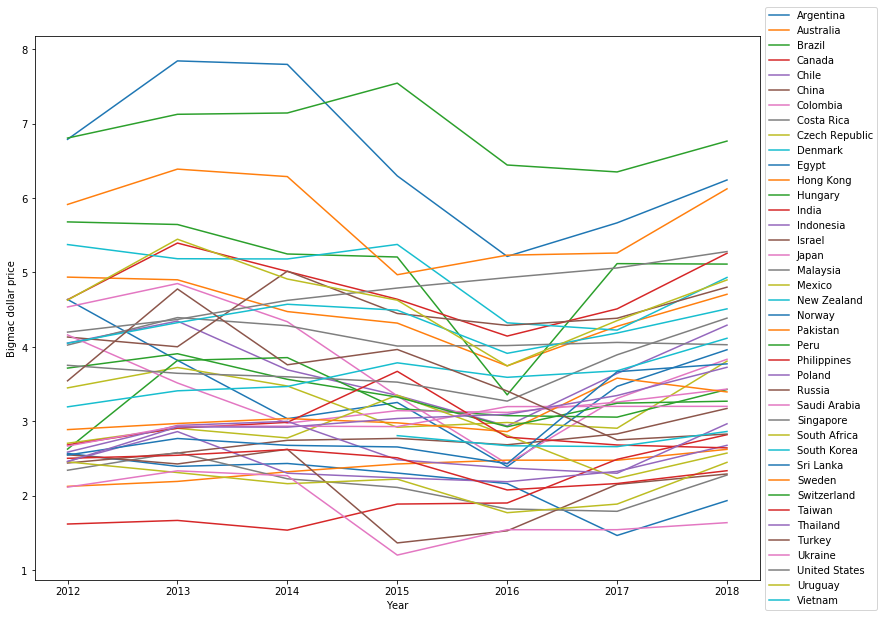

In [15]:
fig, ax = plt.subplots(figsize=(13,10))
df.groupby(['Year','Country']).sum()['dollar price'].unstack().plot(ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Bigmac dollar price')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

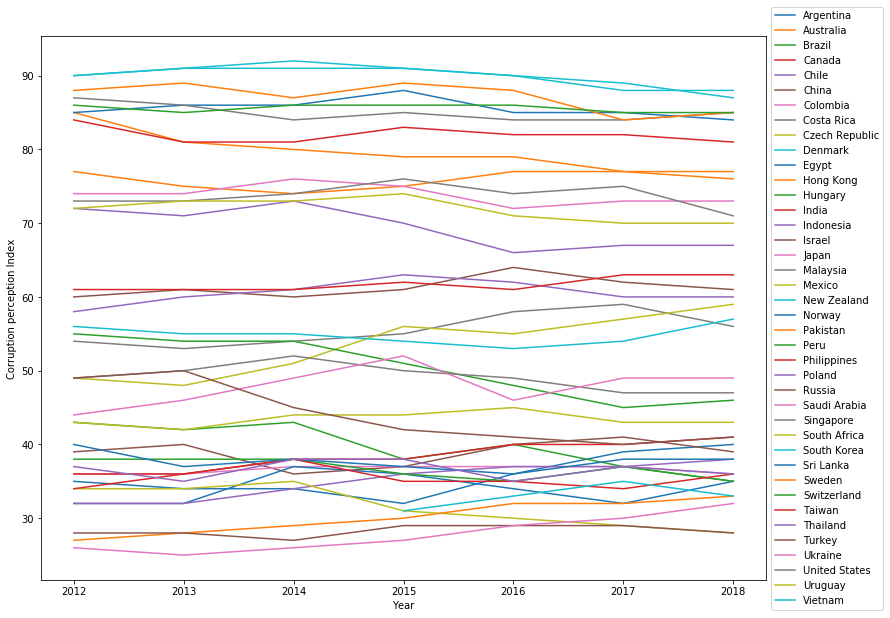

In [16]:
fig, ax = plt.subplots(figsize=(13,10))
df.groupby(['Year','Country']).sum()['Corruption perception Index'].unstack().plot(ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Corruption perception Index')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

/home/u1244699/.local/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


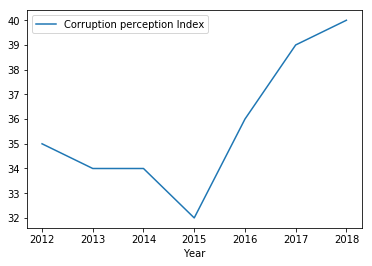

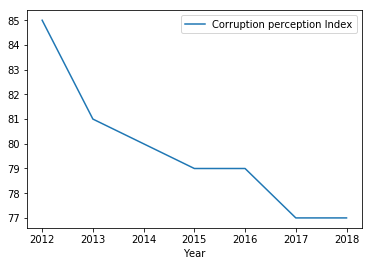

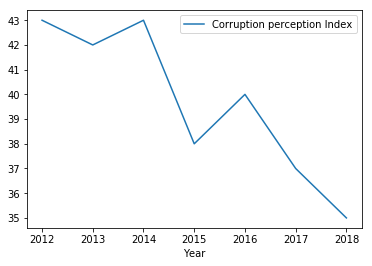

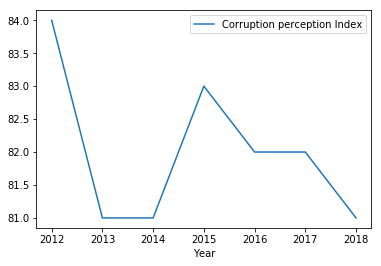

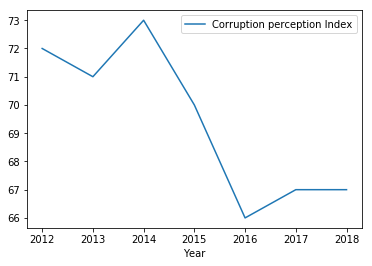

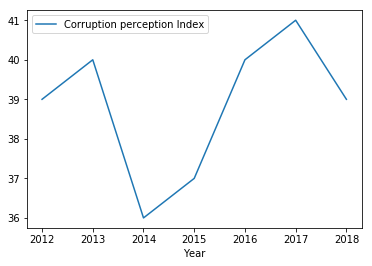

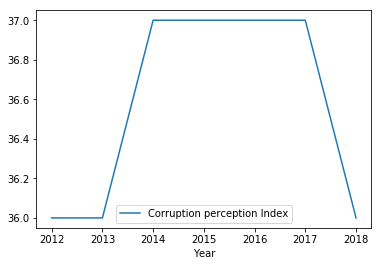

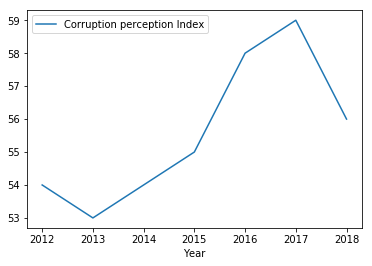

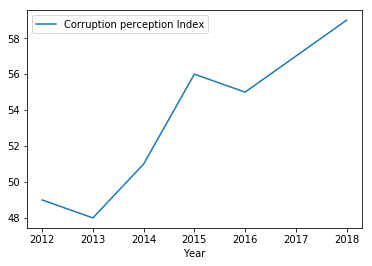

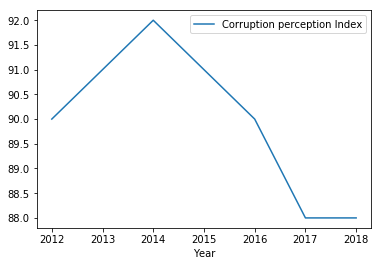

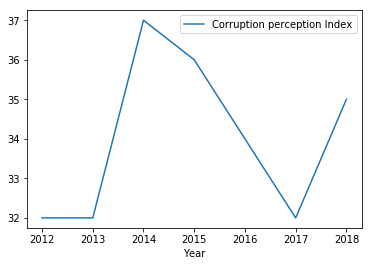

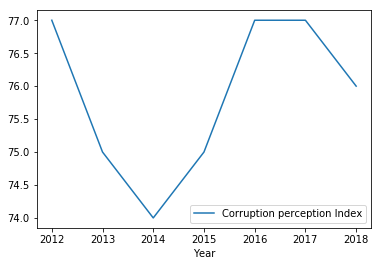

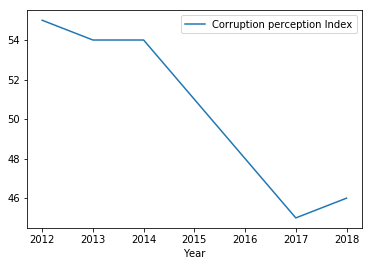

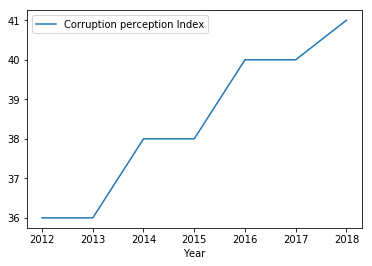

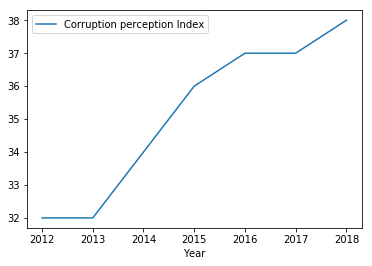

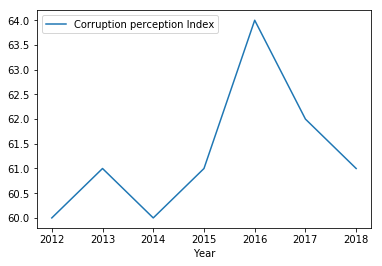

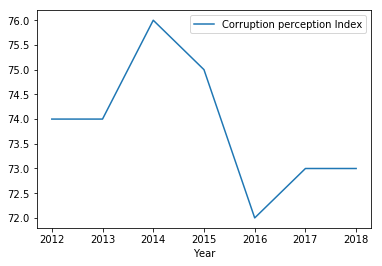

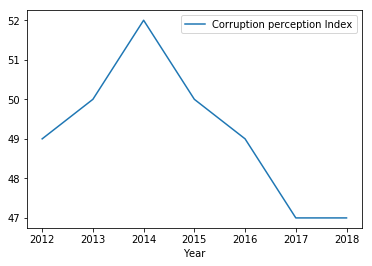

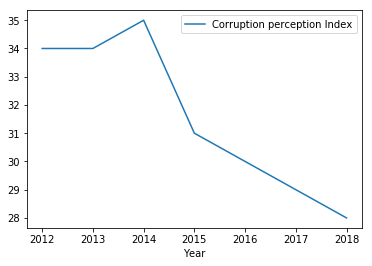

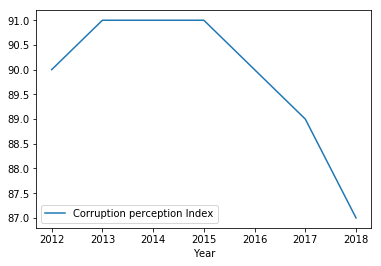

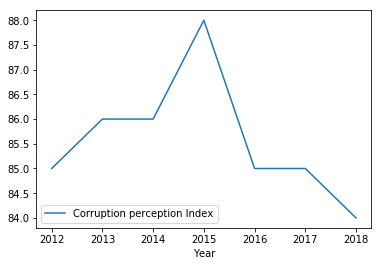

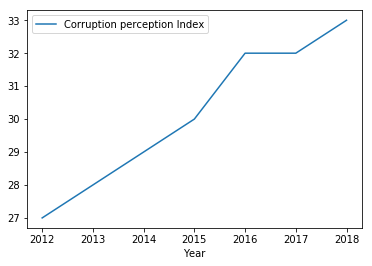

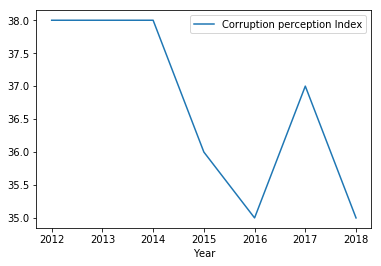

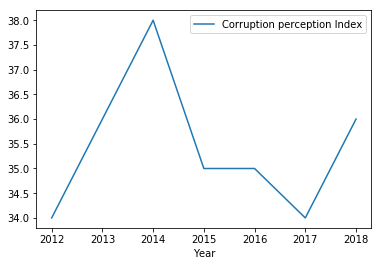

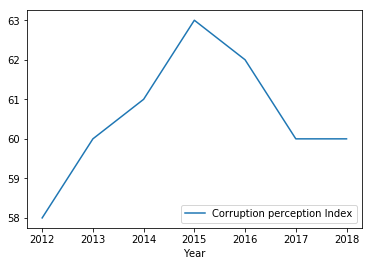

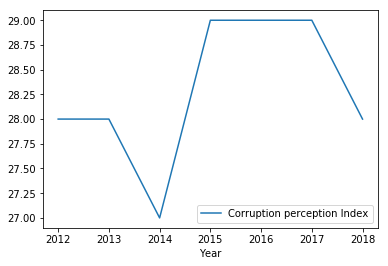

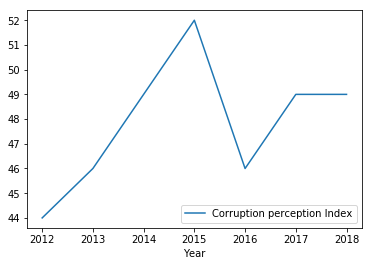

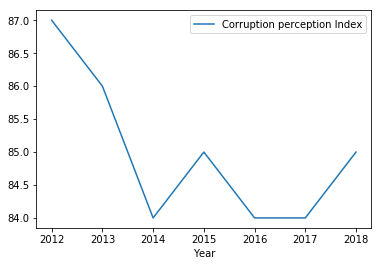

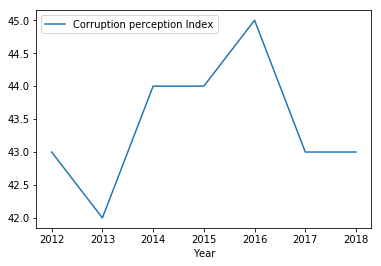

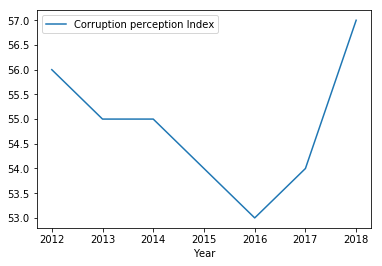

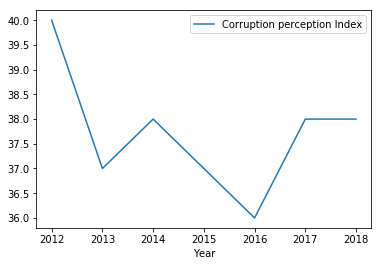

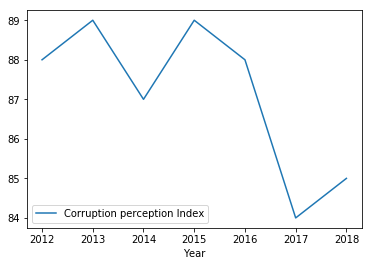

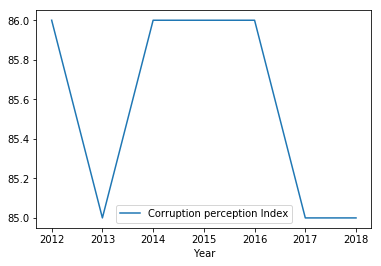

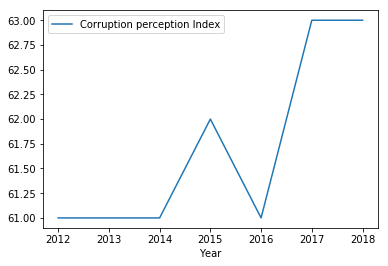

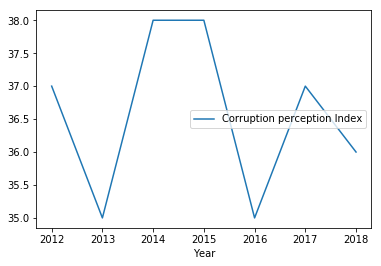

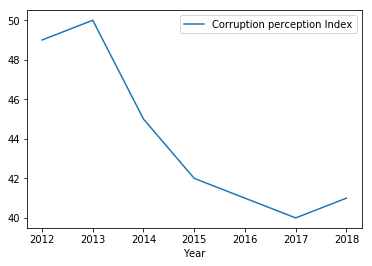

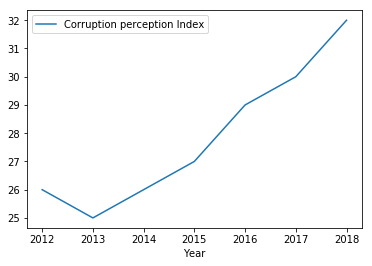

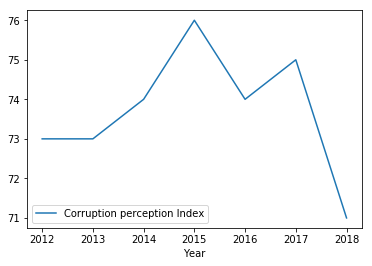

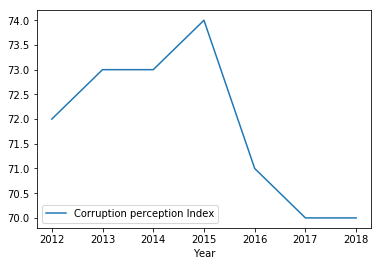

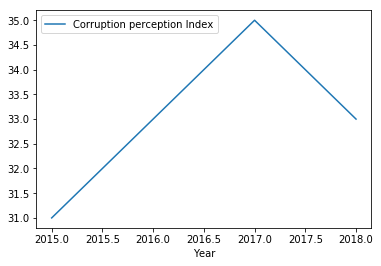

In [17]:
df.groupby('Country').plot(x='Year', y='Corruption perception Index')
plt.show()

/home/u1244699/.local/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


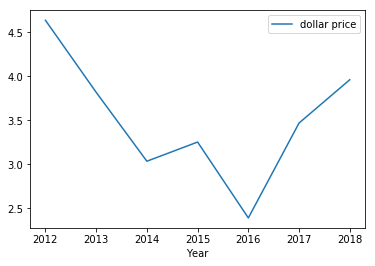

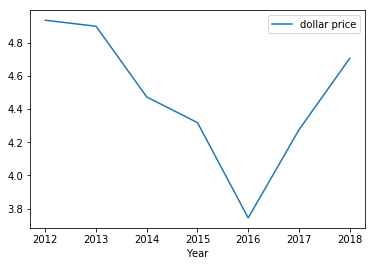

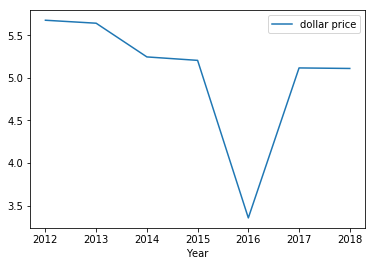

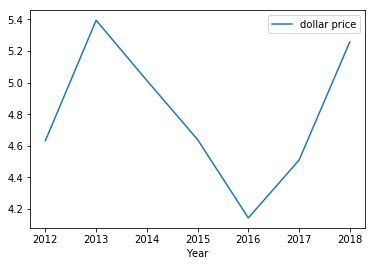

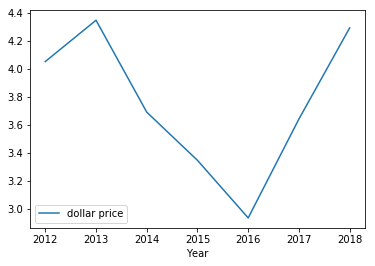

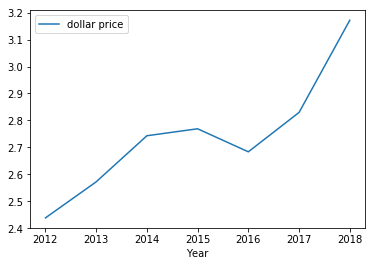

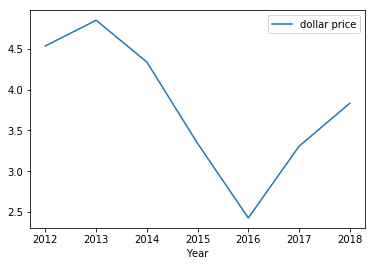

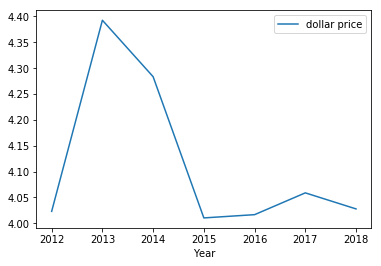

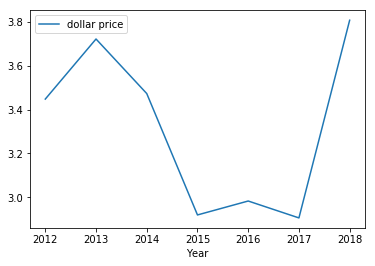

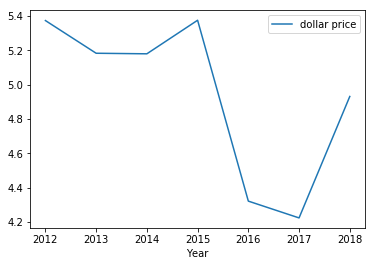

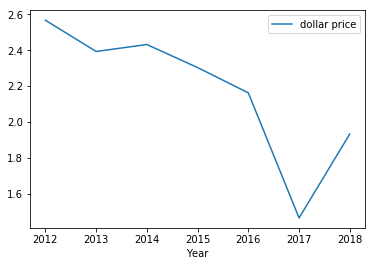

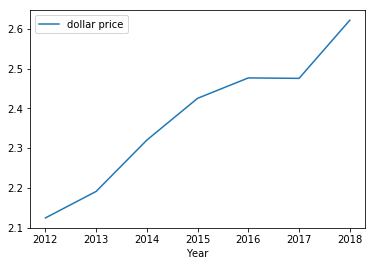

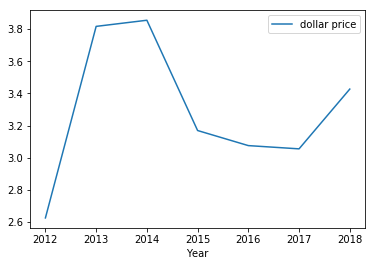

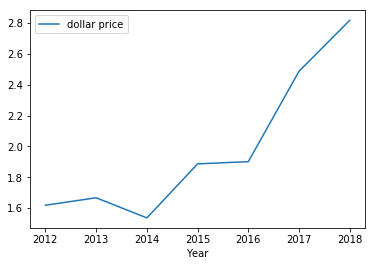

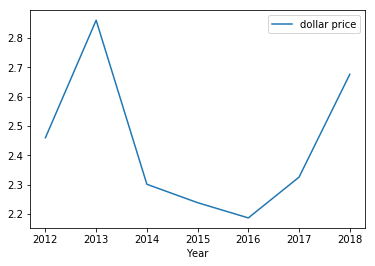

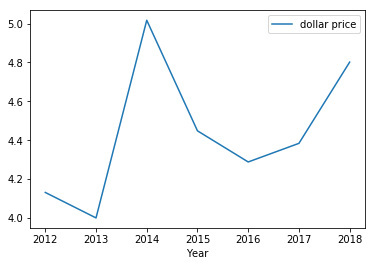

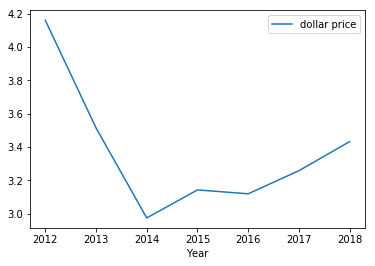

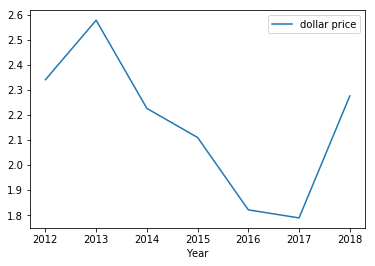

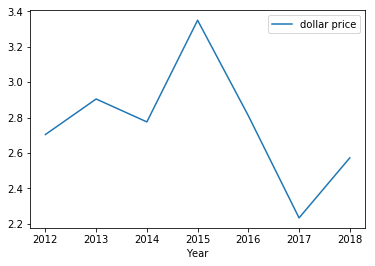

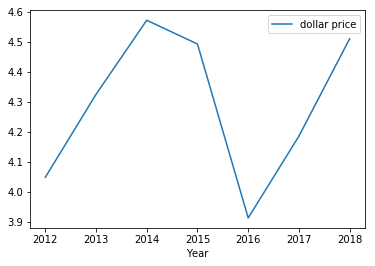

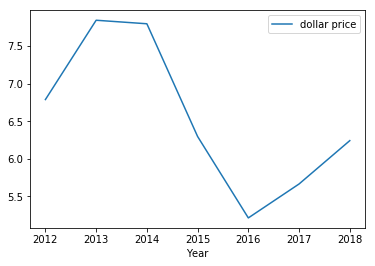

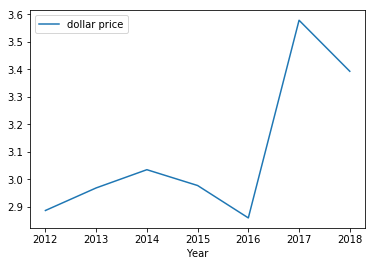

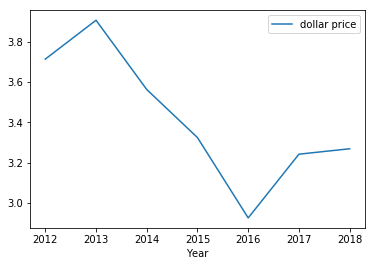

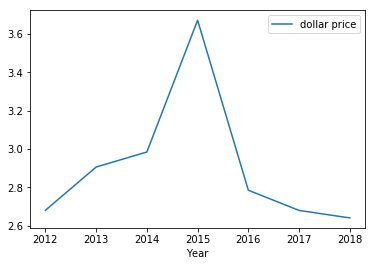

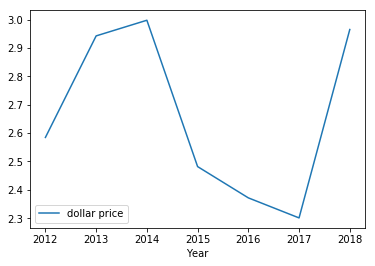

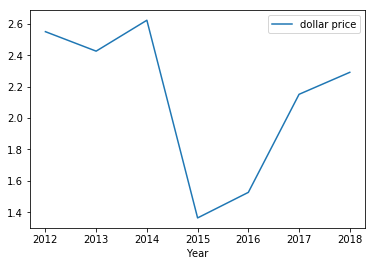

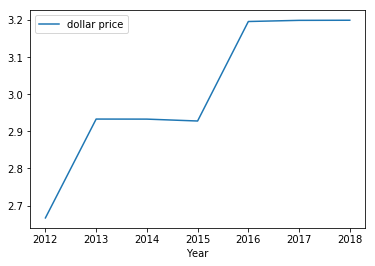

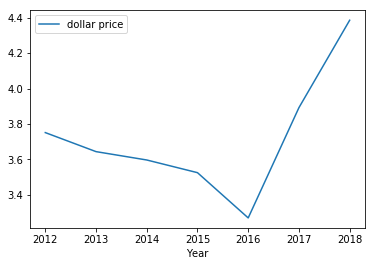

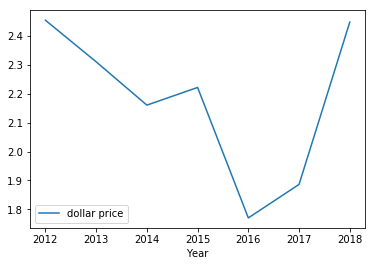

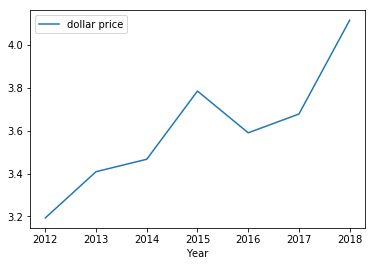

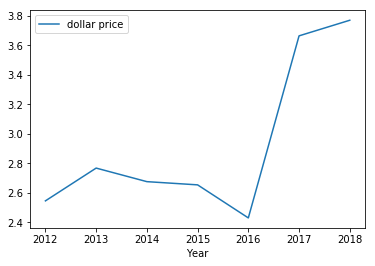

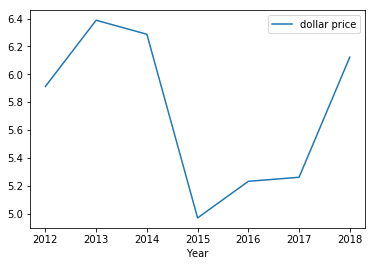

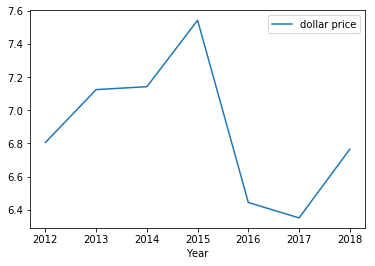

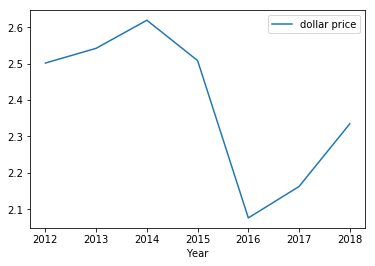

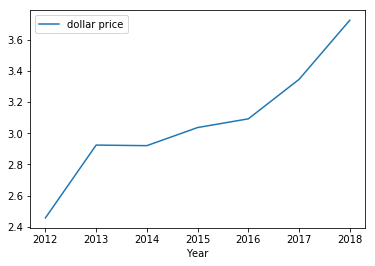

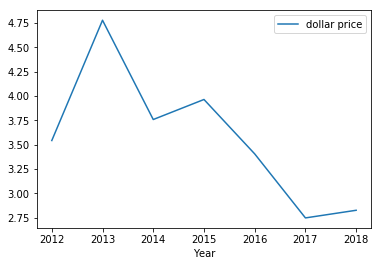

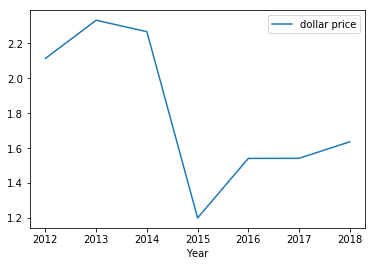

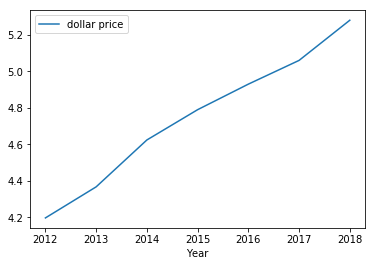

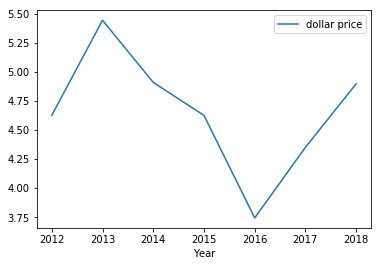

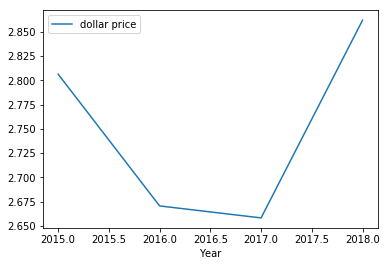

In [18]:
df.groupby('Country').plot(x='Year', y='dollar price')
plt.show()

/home/u1244699/.local/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


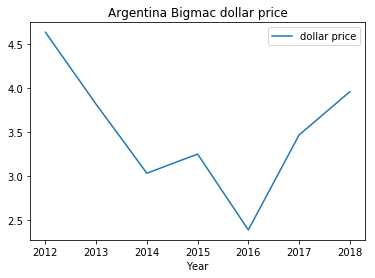

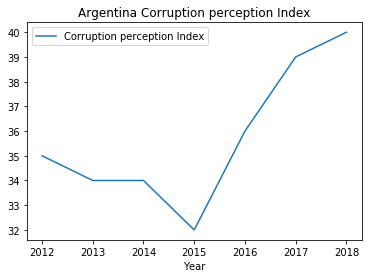

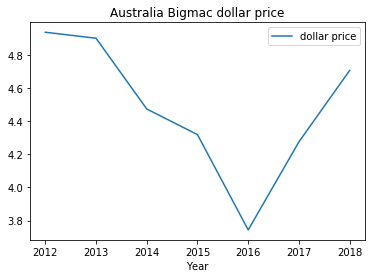

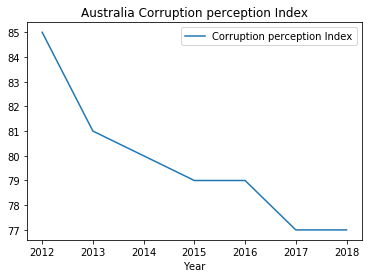

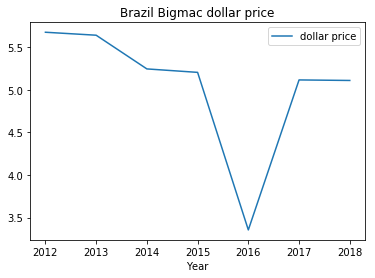

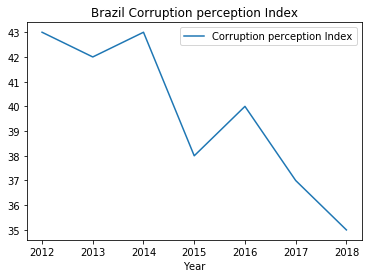

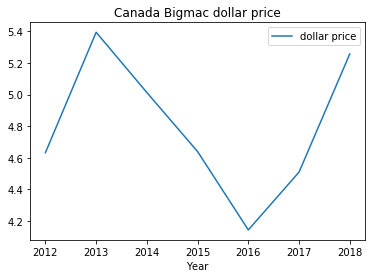

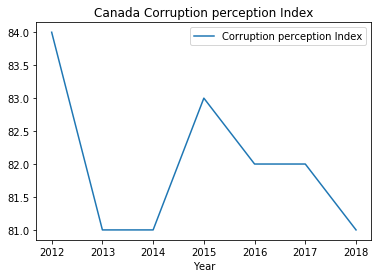

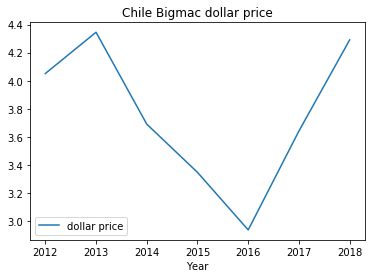

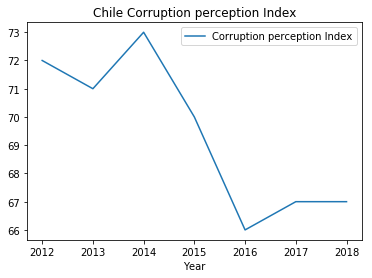

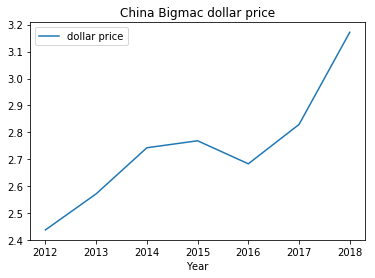

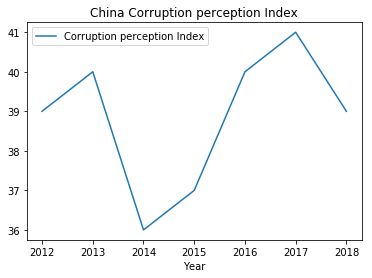

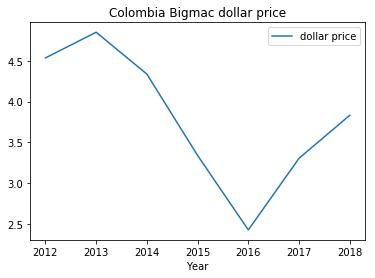

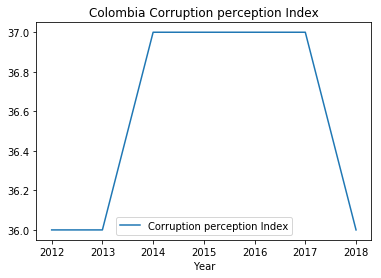

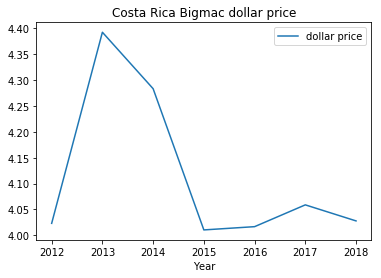

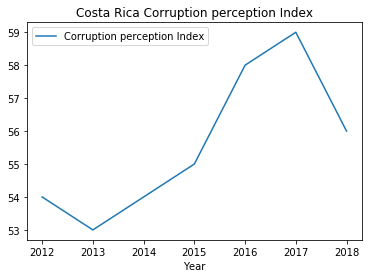

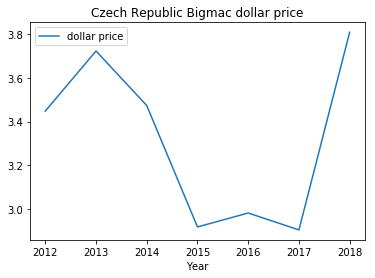

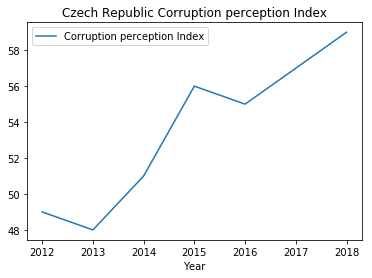

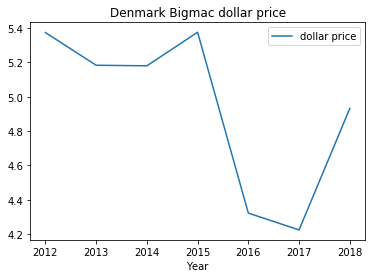

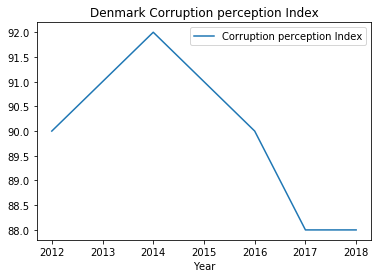

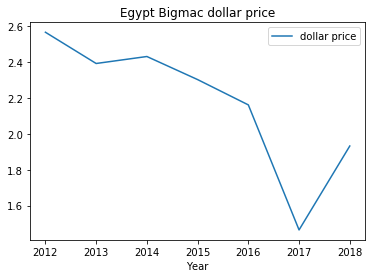

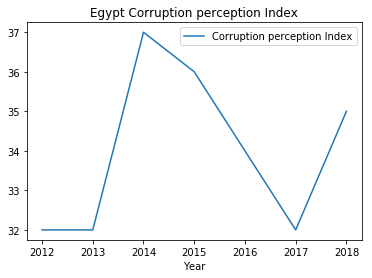

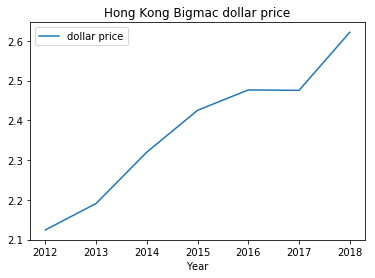

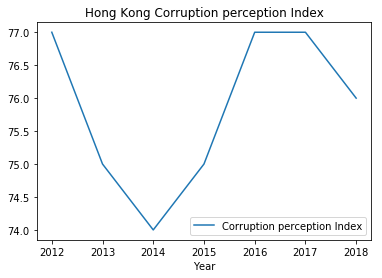

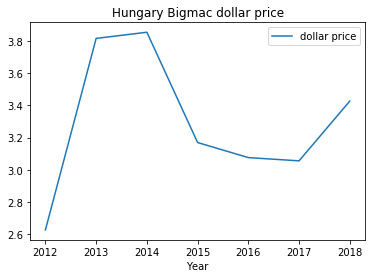

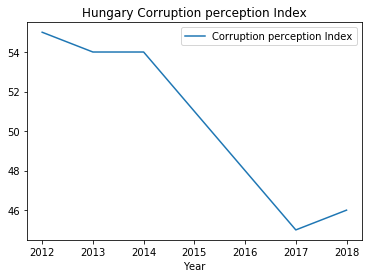

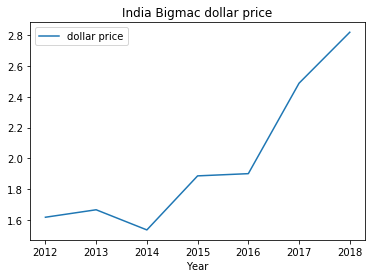

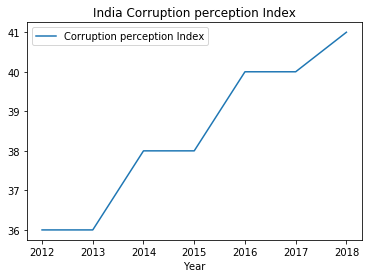

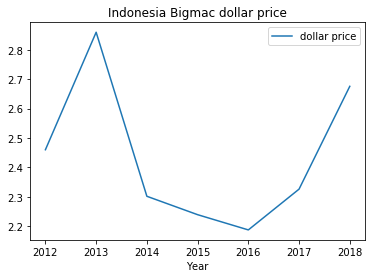

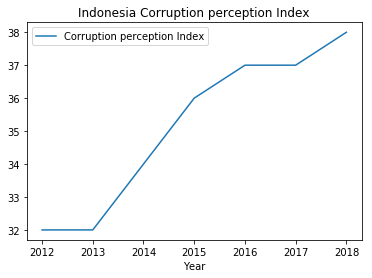

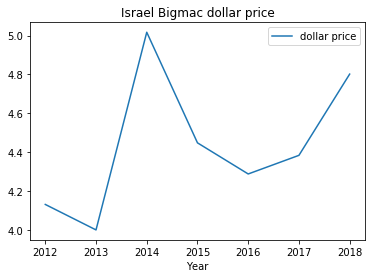

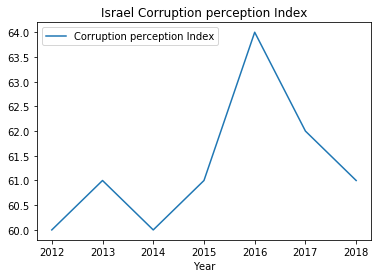

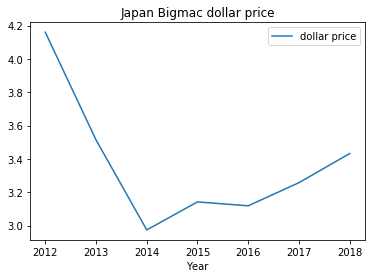

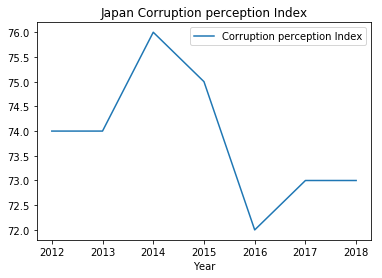

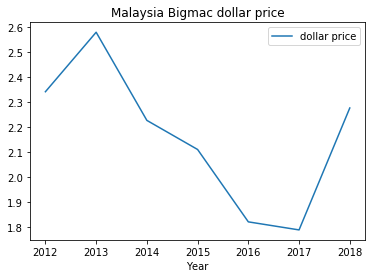

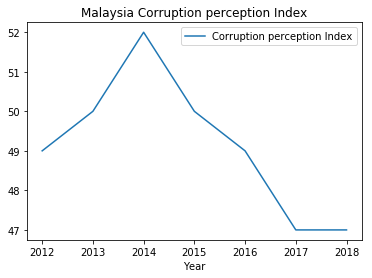

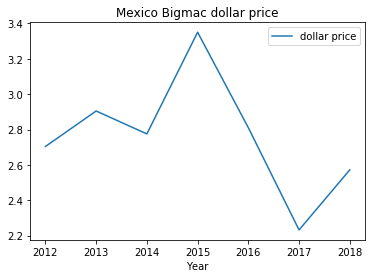

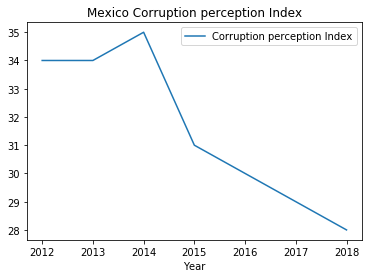

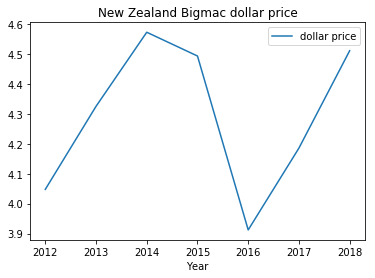

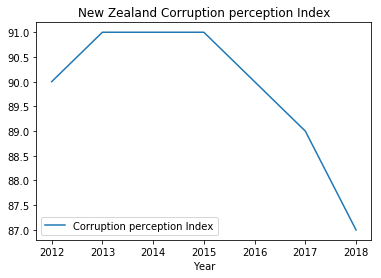

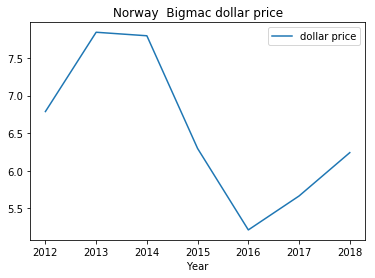

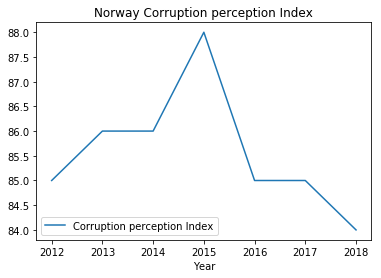

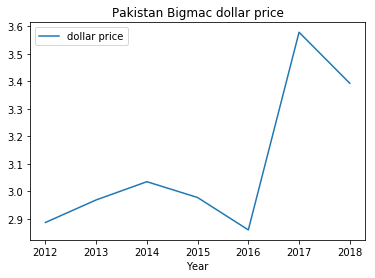

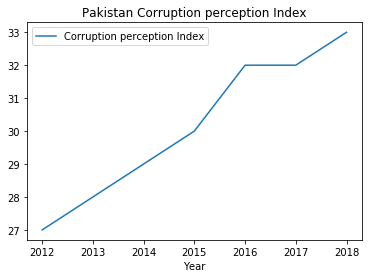

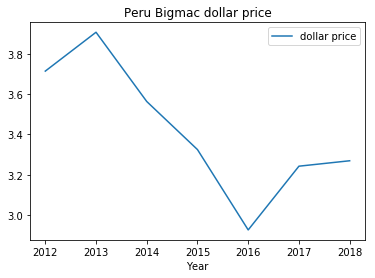

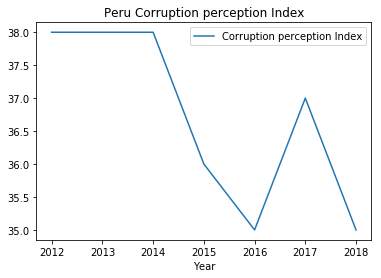

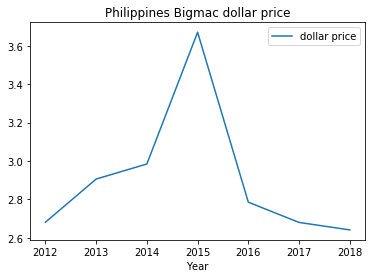

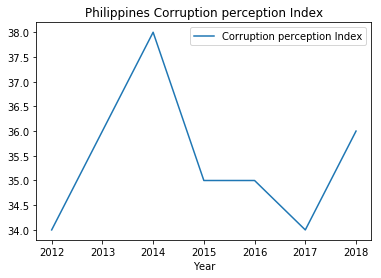

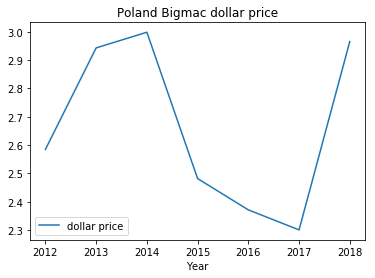

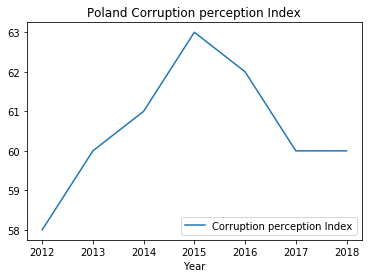

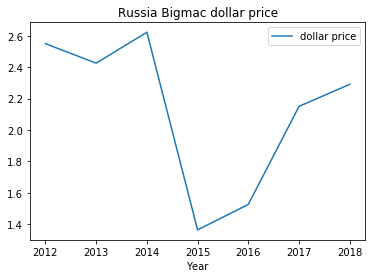

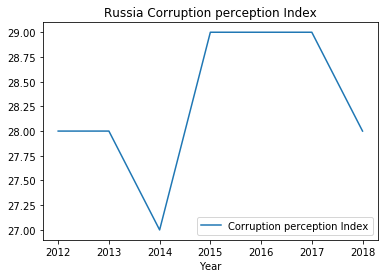

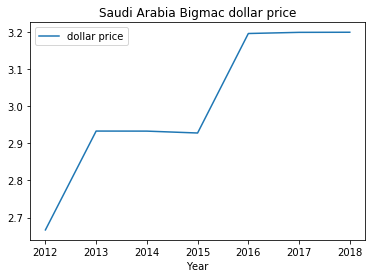

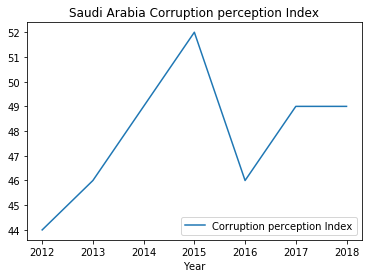

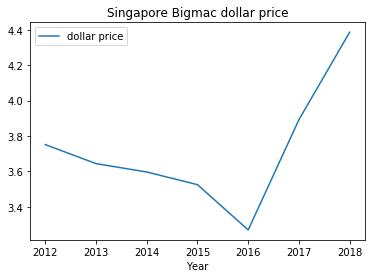

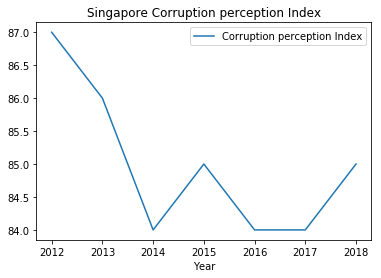

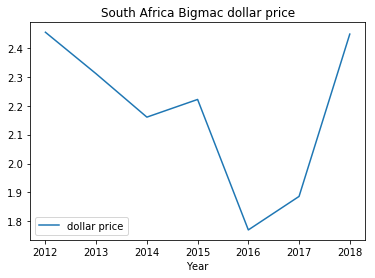

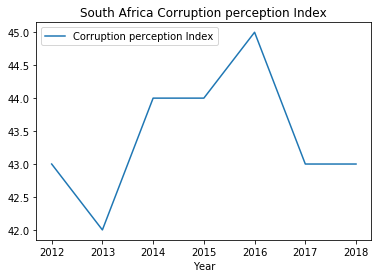

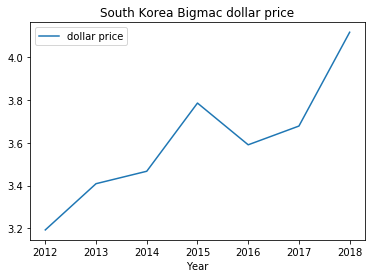

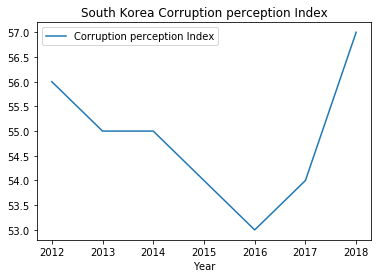

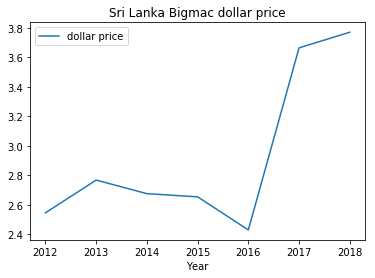

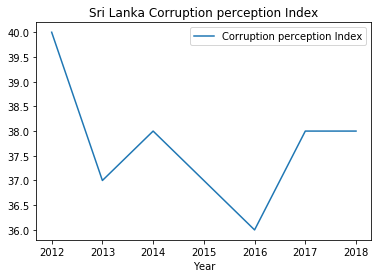

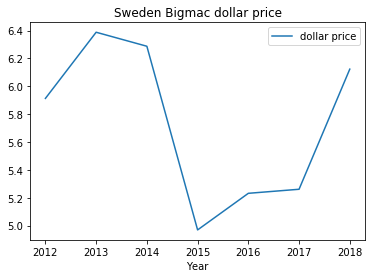

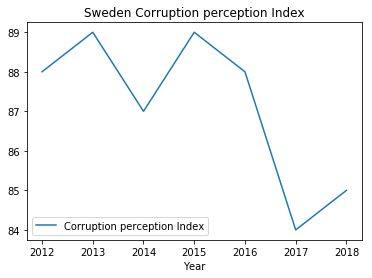

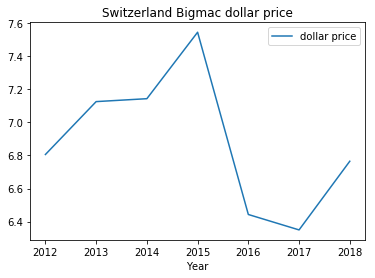

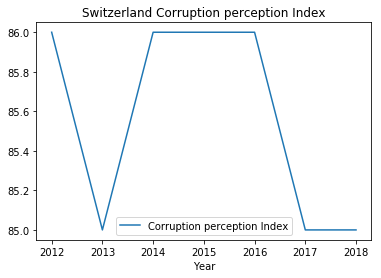

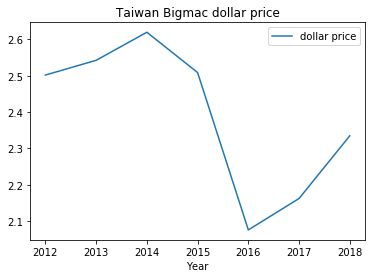

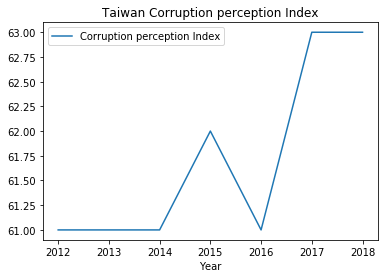

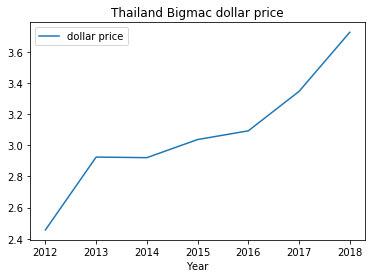

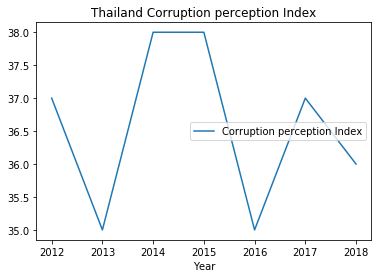

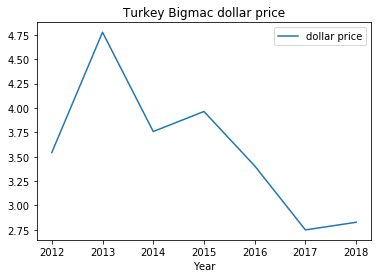

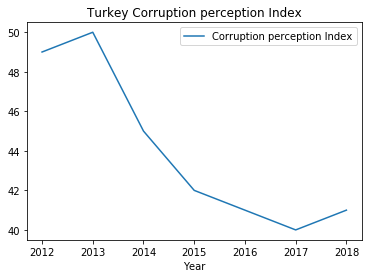

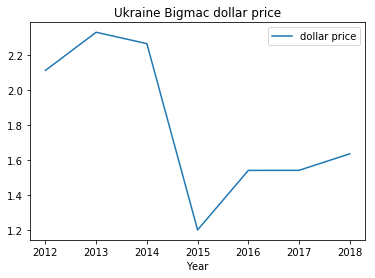

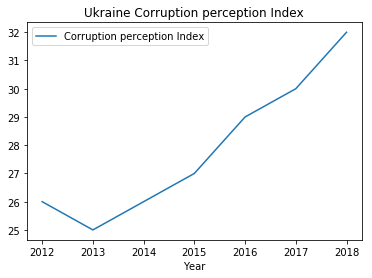

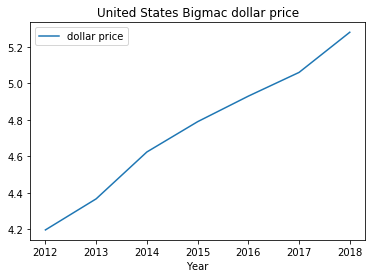

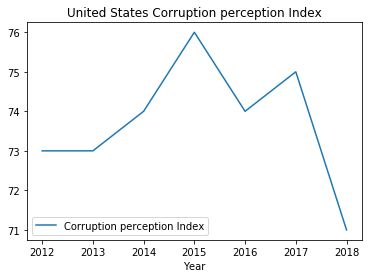

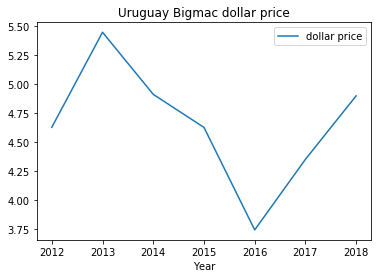

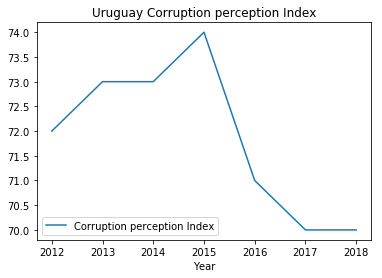

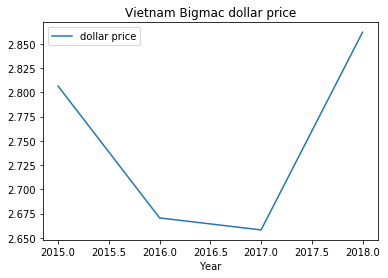

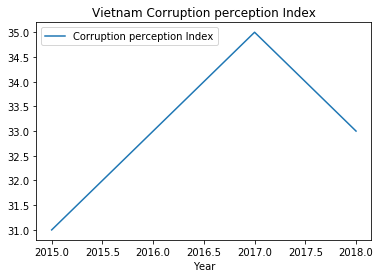

In [19]:
dff.iloc[0:7].plot(x='Year',y='dollar price')
plt.title('Argentina Bigmac dollar price')
dff.iloc[0:7].plot(x='Year',y='Corruption perception Index')
plt.title('Argentina Corruption perception Index')

dff.iloc[7:14].plot(x='Year',y='dollar price')
plt.title('Australia Bigmac dollar price')
dff.iloc[7:14].plot(x='Year',y='Corruption perception Index')
plt.title('Australia Corruption perception Index')

dff.iloc[14:21].plot(x='Year',y='dollar price')
plt.title('Brazil Bigmac dollar price')
dff.iloc[14:21].plot(x='Year',y='Corruption perception Index')
plt.title('Brazil Corruption perception Index')

dff.iloc[21:28].plot(x='Year',y='dollar price')
plt.title('Canada Bigmac dollar price')
dff.iloc[21:28].plot(x='Year',y='Corruption perception Index')
plt.title('Canada Corruption perception Index')

dff.iloc[28:35].plot(x='Year',y='dollar price')
plt.title('Chile Bigmac dollar price')
dff.iloc[28:35].plot(x='Year',y='Corruption perception Index')
plt.title('Chile Corruption perception Index')

dff.iloc[35:42].plot(x='Year',y='dollar price')
plt.title('China Bigmac dollar price')
dff.iloc[35:42].plot(x='Year',y='Corruption perception Index')
plt.title('China Corruption perception Index')

dff.iloc[42:49].plot(x='Year',y='dollar price')
plt.title('Colombia Bigmac dollar price')
dff.iloc[42:49].plot(x='Year',y='Corruption perception Index')
plt.title('Colombia Corruption perception Index')

dff.iloc[49:56].plot(x='Year',y='dollar price')
plt.title('Costa Rica Bigmac dollar price')
dff.iloc[49:56].plot(x='Year',y='Corruption perception Index')
plt.title('Costa Rica Corruption perception Index')

dff.iloc[56:63].plot(x='Year',y='dollar price')
plt.title('Czech Republic Bigmac dollar price')
dff.iloc[56:63].plot(x='Year',y='Corruption perception Index')
plt.title('Czech Republic Corruption perception Index')

dff.iloc[63:70].plot(x='Year',y='dollar price')
plt.title('Denmark Bigmac dollar price')
dff.iloc[63:70].plot(x='Year',y='Corruption perception Index')
plt.title('Denmark Corruption perception Index')

dff.iloc[70:77].plot(x='Year',y='dollar price')
plt.title('Egypt Bigmac dollar price')
dff.iloc[70:77].plot(x='Year',y='Corruption perception Index')
plt.title('Egypt Corruption perception Index')

dff.iloc[77:84].plot(x='Year',y='dollar price')
plt.title('Hong Kong Bigmac dollar price')
dff.iloc[77:84].plot(x='Year',y='Corruption perception Index')
plt.title('Hong Kong Corruption perception Index')

dff.iloc[84:91].plot(x='Year',y='dollar price')
plt.title('Hungary Bigmac dollar price')
dff.iloc[84:91].plot(x='Year',y='Corruption perception Index')
plt.title('Hungary Corruption perception Index')

dff.iloc[91:98].plot(x='Year',y='dollar price')
plt.title('India Bigmac dollar price')
dff.iloc[91:98].plot(x='Year',y='Corruption perception Index')
plt.title('India Corruption perception Index')

dff.iloc[98:105].plot(x='Year',y='dollar price')
plt.title('Indonesia Bigmac dollar price')
dff.iloc[98:105].plot(x='Year',y='Corruption perception Index')
plt.title('Indonesia Corruption perception Index')

dff.iloc[105:112].plot(x='Year',y='dollar price')
plt.title('Israel Bigmac dollar price')
dff.iloc[105:112].plot(x='Year',y='Corruption perception Index')
plt.title('Israel Corruption perception Index')

dff.iloc[112:119].plot(x='Year',y='dollar price')
plt.title('Japan Bigmac dollar price')
dff.iloc[112:119].plot(x='Year',y='Corruption perception Index')
plt.title('Japan Corruption perception Index')

dff.iloc[119:126].plot(x='Year',y='dollar price')
plt.title('Malaysia Bigmac dollar price')
dff.iloc[119:126].plot(x='Year',y='Corruption perception Index')
plt.title('Malaysia Corruption perception Index')

dff.iloc[126:133].plot(x='Year',y='dollar price')
plt.title('Mexico Bigmac dollar price')
dff.iloc[126:133].plot(x='Year',y='Corruption perception Index')
plt.title('Mexico Corruption perception Index')

dff.iloc[133:140].plot(x='Year',y='dollar price')
plt.title('New Zealand Bigmac dollar price')
dff.iloc[133:140].plot(x='Year',y='Corruption perception Index')
plt.title('New Zealand Corruption perception Index')

dff.iloc[140:147].plot(x='Year',y='dollar price')
plt.title('Norway  Bigmac dollar price')
dff.iloc[140:147].plot(x='Year',y='Corruption perception Index')
plt.title('Norway Corruption perception Index')

dff.iloc[147:154].plot(x='Year',y='dollar price')
plt.title('Pakistan Bigmac dollar price')
dff.iloc[147:154].plot(x='Year',y='Corruption perception Index')
plt.title('Pakistan Corruption perception Index')

dff.iloc[154:161].plot(x='Year',y='dollar price')
plt.title('Peru Bigmac dollar price')
dff.iloc[154:161].plot(x='Year',y='Corruption perception Index')
plt.title('Peru Corruption perception Index')

dff.iloc[161:168].plot(x='Year',y='dollar price')
plt.title('Philippines Bigmac dollar price')
dff.iloc[161:168].plot(x='Year',y='Corruption perception Index')
plt.title('Philippines Corruption perception Index')

dff.iloc[168:175].plot(x='Year',y='dollar price')
plt.title('Poland Bigmac dollar price')
dff.iloc[168:175].plot(x='Year',y='Corruption perception Index')
plt.title('Poland Corruption perception Index')

dff.iloc[175:182].plot(x='Year',y='dollar price')
plt.title('Russia Bigmac dollar price')
dff.iloc[175:182].plot(x='Year',y='Corruption perception Index')
plt.title('Russia Corruption perception Index')

dff.iloc[182:189].plot(x='Year',y='dollar price')
plt.title('Saudi Arabia Bigmac dollar price')
dff.iloc[182:189].plot(x='Year',y='Corruption perception Index')
plt.title('Saudi Arabia Corruption perception Index')

dff.iloc[189:196].plot(x='Year',y='dollar price')
plt.title('Singapore Bigmac dollar price')
dff.iloc[189:196].plot(x='Year',y='Corruption perception Index')
plt.title('Singapore Corruption perception Index')

dff.iloc[196:203].plot(x='Year',y='dollar price')
plt.title('South Africa Bigmac dollar price')
dff.iloc[196:203].plot(x='Year',y='Corruption perception Index')
plt.title('South Africa Corruption perception Index')

dff.iloc[203:210].plot(x='Year',y='dollar price')
plt.title('South Korea Bigmac dollar price')
dff.iloc[203:210].plot(x='Year',y='Corruption perception Index')
plt.title('South Korea Corruption perception Index')

dff.iloc[210:217].plot(x='Year',y='dollar price')
plt.title('Sri Lanka Bigmac dollar price')
dff.iloc[210:217].plot(x='Year',y='Corruption perception Index')
plt.title('Sri Lanka Corruption perception Index')

dff.iloc[217:224].plot(x='Year',y='dollar price')
plt.title('Sweden Bigmac dollar price')
dff.iloc[217:224].plot(x='Year',y='Corruption perception Index')
plt.title('Sweden Corruption perception Index')

dff.iloc[224:231].plot(x='Year',y='dollar price')
plt.title('Switzerland Bigmac dollar price')
dff.iloc[224:231].plot(x='Year',y='Corruption perception Index')
plt.title('Switzerland Corruption perception Index')

dff.iloc[231:238].plot(x='Year',y='dollar price')
plt.title('Taiwan Bigmac dollar price')
dff.iloc[231:238].plot(x='Year',y='Corruption perception Index')
plt.title('Taiwan Corruption perception Index')

dff.iloc[238:245].plot(x='Year',y='dollar price')
plt.title('Thailand Bigmac dollar price')
dff.iloc[238:245].plot(x='Year',y='Corruption perception Index')
plt.title('Thailand Corruption perception Index')

dff.iloc[245:252].plot(x='Year',y='dollar price')
plt.title('Turkey Bigmac dollar price')
dff.iloc[245:252].plot(x='Year',y='Corruption perception Index')
plt.title('Turkey Corruption perception Index')

dff.iloc[252:259].plot(x='Year',y='dollar price')
plt.title('Ukraine Bigmac dollar price')
dff.iloc[252:259].plot(x='Year',y='Corruption perception Index')
plt.title('Ukraine Corruption perception Index')

dff.iloc[259:266].plot(x='Year',y='dollar price')
plt.title('United States Bigmac dollar price')
dff.iloc[259:266].plot(x='Year',y='Corruption perception Index')
plt.title('United States Corruption perception Index')

dff.iloc[266:273].plot(x='Year',y='dollar price')
plt.title('Uruguay Bigmac dollar price')
dff.iloc[266:273].plot(x='Year',y='Corruption perception Index')
plt.title('Uruguay Corruption perception Index')

dff.iloc[273:277].plot(x='Year',y='dollar price')
plt.title('Vietnam Bigmac dollar price')
dff.iloc[273:277].plot(x='Year',y='Corruption perception Index')
plt.title('Vietnam Corruption perception Index')
plt.show()

The graphs above do not directly show correlation. The corruption perception Index hardly changes over the 7 year period. Which makes it not possible to answer the research question based on the graphs above. Another possibility is making a scatter plot. Below are shown two scatter plots, with on the x-as the Corruption perception Index and the Bigmac dollar price on the y-as. It includes all datapoints, this means for all 40 countries 7 dots leading to 280 points in the scatter plot. The second scatter plot is simular to scatter1 but uses averages of the Corruption perception Index and the Bigmac dollar price. Each dot shows the average value for a specific country. The red dot is the United States, this one is highlighted because the the United States is used as base catogorie.

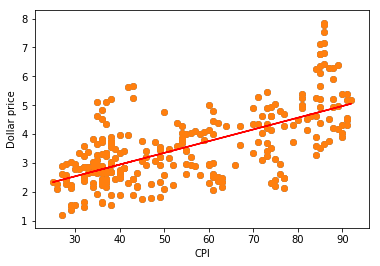

In [20]:
scatter1 = plt.scatter(df['Corruption perception Index'],df['dollar price'])
plt.xlabel('CPI')
plt.ylabel('Dollar price')
x = df['Corruption perception Index']
y = df['dollar price']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r")
plt.show()


In [21]:
df2=df.groupby("Country").mean()

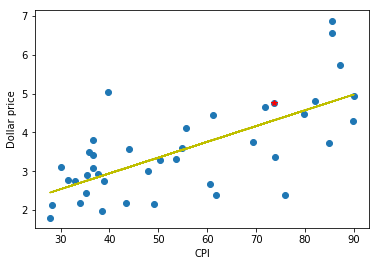

In [23]:
scatter2 = df2[['Corruption perception Index', 'dollar price']]
x = df2['Corruption perception Index']
y = df2['dollar price']
plt.xlabel('CPI')
plt.ylabel('Dollar price')
plt.plot(x[-3:-2], y[-3:-2], 'r*')
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"y")
plt.show()

These two scatter plots do show a link between the Corruption perception Index and the Bigmac dollar price. Countries with a higher corruption perception index(less corrupt) pay a higher dollar price for a Bigmac. 

# Discussion and conclusion



First I looked at the grouped data, I could not conclude anything from comparing the Big Mac Index and the Corruption Perception Index per country. This is something that can be done statistically. With the assumption that everything else stays equal a fixed effects regression for panal data can be used. This kind of regression can control for time fixed effects aswell. Than it is also possible to see if there is a significant effect. Because I could not draw any conclusions from the grouped data I looked at scatter plots with the Corruption Perception Index on the x-as and the Dollar price of a Big Mac on the y-as. These scatters show a positive effect, countries with a higher Corruption Perception Index show also a higher dollar price. This is surprising, as mentioned before, I expected a negative effect. More corruption leads to more costs, this is not shown in the assignment. This is probally the case because corruption is highly correlated with wealth. First world countries have a higher corruption perception index and are richer, this probably inlfluences the Big Mac dollar price aswell. Another reason that might influence results is the assumption that everything else stays equal. This assumption most likely does not hold, if in the future this is done statistically it is important that some covariates are added. For example, exchange rates change, the change in exchange rates does also influence the Big Mac dollar price and might influence results. 

The results found are surprising and need to be investigated further, in my opinion a fixed effects panal data regression fits the data the best. But it is important to think about more covariables, some important factors do change over time and are not taken into account so far. 